<a href="https://colab.research.google.com/github/henriqueburis/detect_traffic_signs/blob/main/detect_traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html
https://github.com/michelpf/fiap-ml-visao-computacional/blob/master/extra/yolo-transfer-learning-descriptors.ipynb

In [ ]:
#!pip install opencv-python numpy

In [8]:
print(cv2.__version__)

4.8.0


In [10]:
!wget 'https://pjreddie.com/media/files/yolov3.weights'
!wget 'https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg'
!wget 'https://opencv-tutorial.readthedocs.io/en/latest/_downloads/a9fb13cbea0745f3d11da9017d1b8467/coco.names'

--2023-10-03 20:13:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  45.6MB/s    in 5.7s    

2023-10-03 20:14:05 (41.8 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [40]:
#!wget 'https://as2.ftcdn.net/v2/jpg/03/36/15/03/1000_F_336150326_pSJoKBKiaXxKLbJbCMgsvNBLCSULQb65.jpg'
!wget 'https://s2.glbimg.com/1XR-8dIVljsAe25R1e4SuFRWTzNg1kkBw2TeAHWSakxIoz-HdGixxa_8qOZvMp3w/s.glbimg.com/jo/g1/f/original/2012/08/30/nova_imagem_1.jpg'

--2023-10-03 20:47:25--  https://s2.glbimg.com/1XR-8dIVljsAe25R1e4SuFRWTzNg1kkBw2TeAHWSakxIoz-HdGixxa_8qOZvMp3w/s.glbimg.com/jo/g1/f/original/2012/08/30/nova_imagem_1.jpg
Resolving s2.glbimg.com (s2.glbimg.com)... 186.192.91.9
Connecting to s2.glbimg.com (s2.glbimg.com)|186.192.91.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97421 (95K) [image/jpeg]
Saving to: ‘nova_imagem_1.jpg’

nova_imagem_1.jpg   100%[===================>]  95.14K   374KB/s    in 0.3s    

2023-10-03 20:47:26 (374 KB/s) - ‘nova_imagem_1.jpg’ saved [97421/97421]



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Carregue o modelo YOLO e os pesos pré-treinados
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Carregue as classes que o modelo YOLO pode detectar (coco.names contém nomes de classes padrão)
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Carregue a imagem em que você deseja realizar a detecção
image = cv2.imread('/content/1000_F_336150326_pSJoKBKiaXxKLbJbCMgsvNBLCSULQb65.jpg')

# Redimensione a imagem e normalize os valores dos pixels
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Defina as classes que você deseja detectar (no caso, placas de trânsito)
desired_classes = ["stop", "yield", "speed_limit"]

# Configuração para a detecção
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

# Inicialize listas para armazenar as informações da detecção
boxes = []
confidences = []
class_ids = []

# Processar saídas de cada camada de saída
for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.9 and classes[class_id] in desired_classes:
            # Obtém as coordenadas da caixa delimitadora
            box = detection[0:4] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (centerX, centerY, width, height) = box.astype("int")

            # Calcula as coordenadas da caixa delimitadora
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Aplicar supressão não máxima para evitar detecções duplicadas
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Desenhar caixas delimitadoras nas detecções
if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Exibir imagem com as detecções
#cv2.imshow('Detected Traffic Signs', image)
cv2_imshow(image)  ### show image from google colab
cv2.waitKey(0)
cv2.destroyAllWindows()

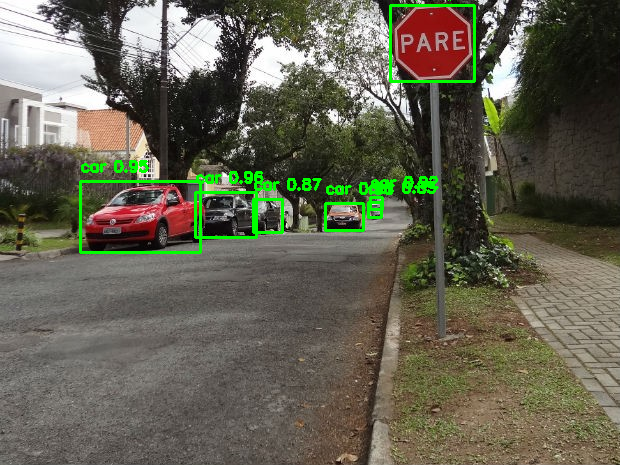

In [41]:
import cv2
import numpy as np

# Carregue o modelo YOLO e os pesos pré-treinados
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Carregue as classes que o modelo YOLO pode detectar (coco.names contém nomes de classes padrão)
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Carregue a imagem em que você deseja realizar a detecção
image = cv2.imread('/content/nova_imagem_1.jpg')

# Redimensione a imagem e normalize os valores dos pixels
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Configuração para a detecção
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

# Inicialize listas para armazenar as informações da detecção
boxes = []
confidences = []
class_ids = []

# Processar saídas de cada camada de saída
for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            # Obtém as coordenadas da caixa delimitadora
            box = detection[0:4] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (centerX, centerY, width, height) = box.astype("int")

            # Calcula as coordenadas da caixa delimitadora
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Aplicar supressão não máxima para evitar detecções duplicadas
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Desenhar caixas delimitadoras nas detecções
if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Exibir imagem com as detecções
#cv2.imshow('Detected Objects', image)
cv2_imshow(image)  ### show image from google colab
cv2.waitKey(0)
cv2.destroyAllWindows()